In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('/Users/surykanthulageri/Desktop')
os.getcwd()

'/Users/surykanthulageri/Desktop'

In [3]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [6]:
movies.shape

(10329, 3)

In [7]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [8]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [9]:
df_rating=df.groupby(['title'])[['rating']].sum()
high_rated=df_rating.nlargest(20,'rating')
high_rated.head()

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 20 artists>

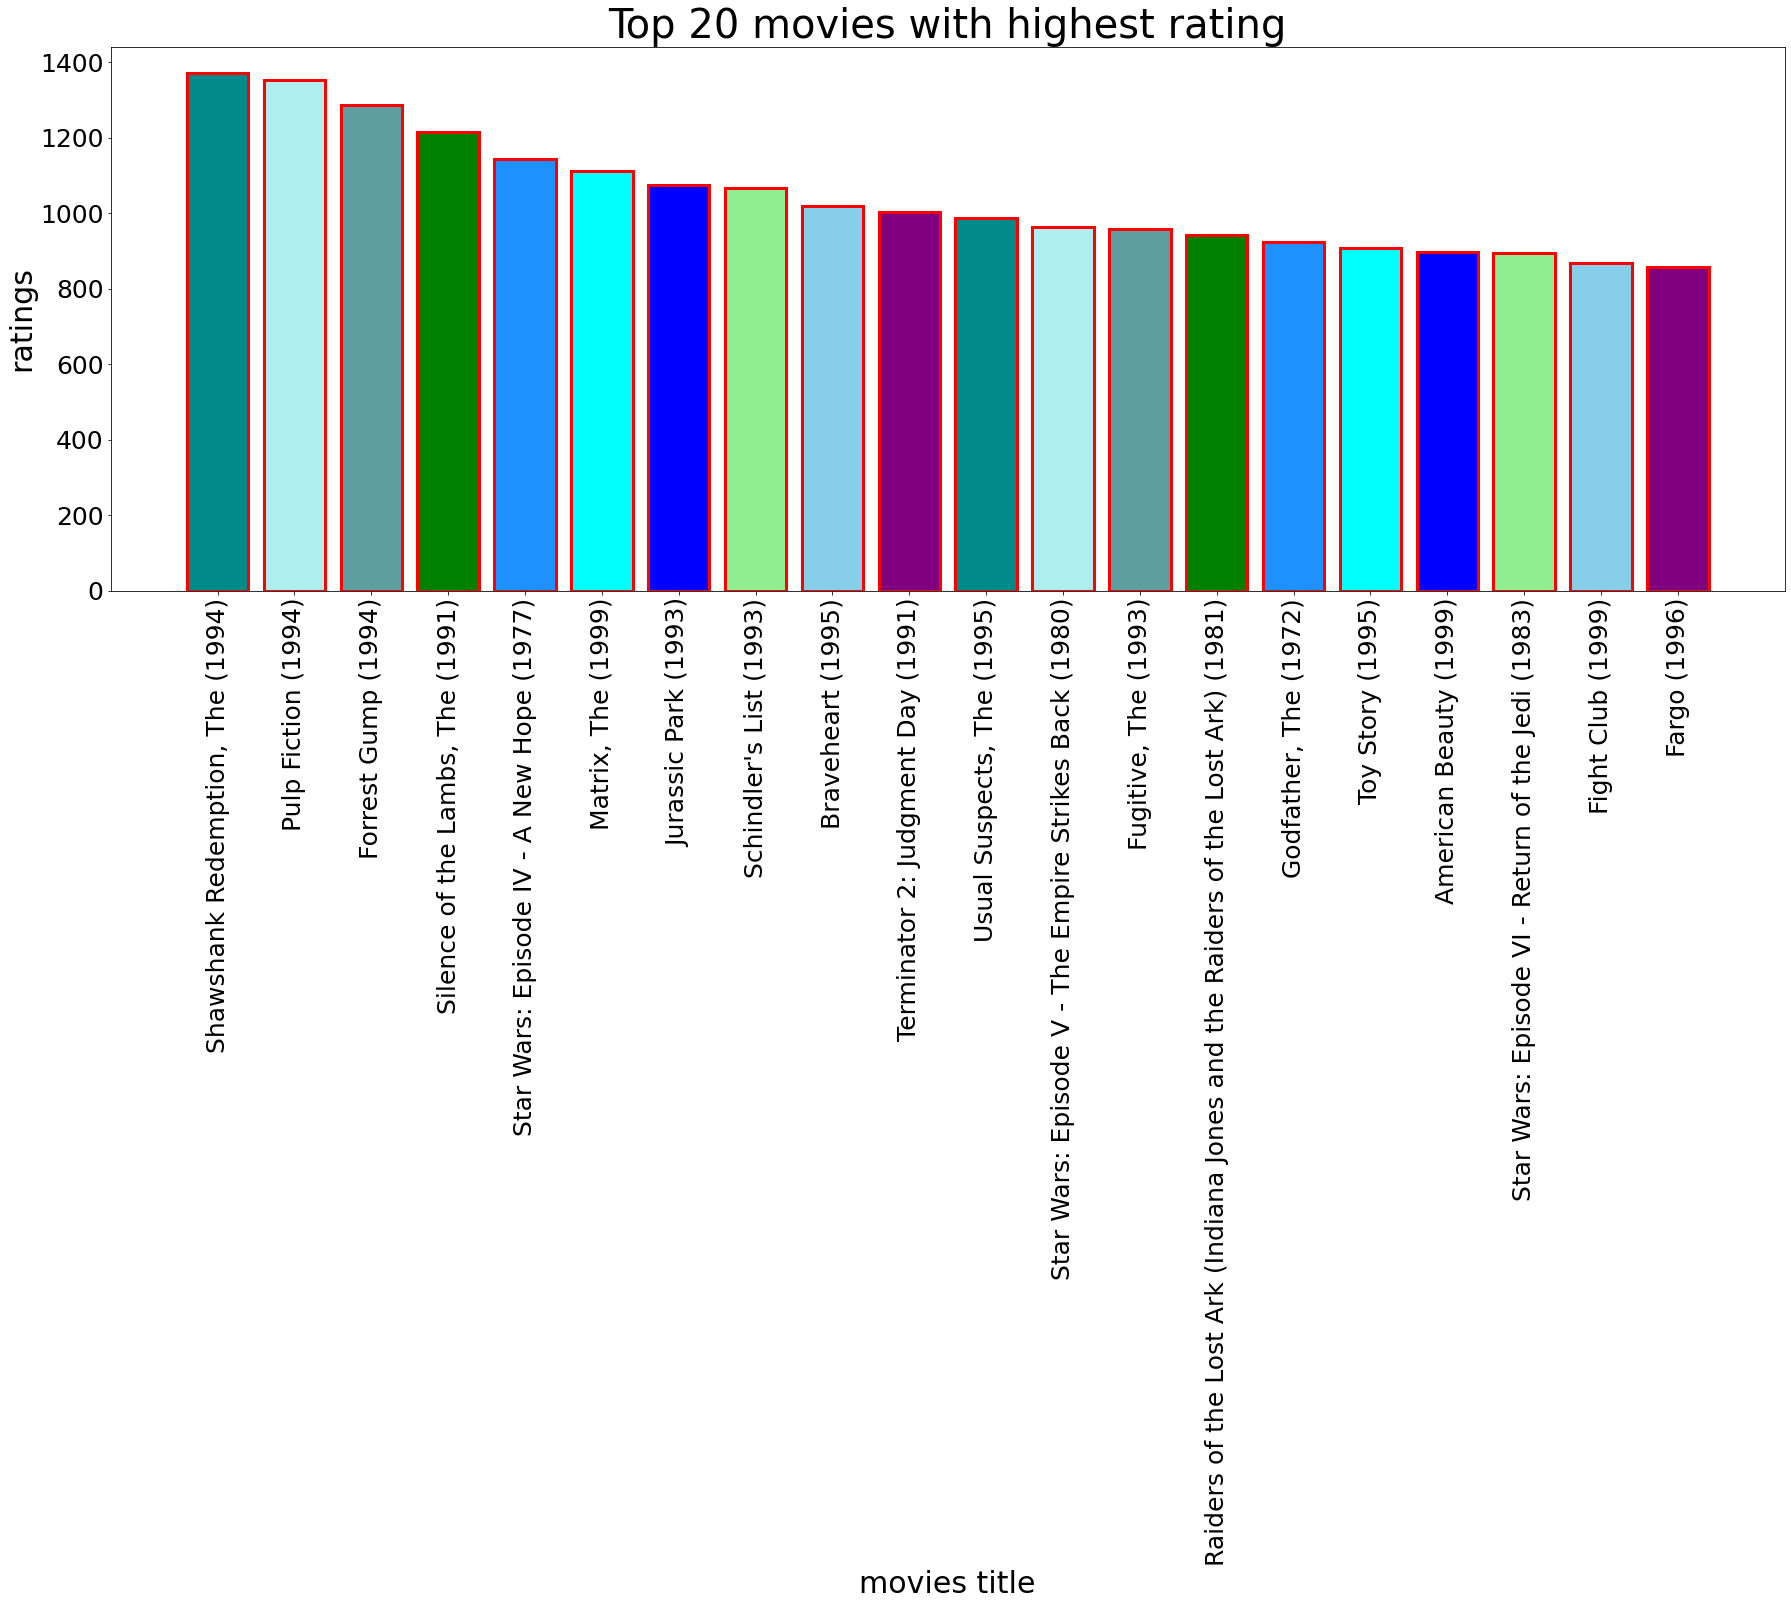

In [10]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['darkcyan','paleturquoise','cadetblue','green','dodgerblue','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)

In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [13]:
ratings.shape

(105339, 4)

In [14]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [15]:
df_rating1=df.groupby('title')[['rating']].count()
rating_count_20=df_rating1.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

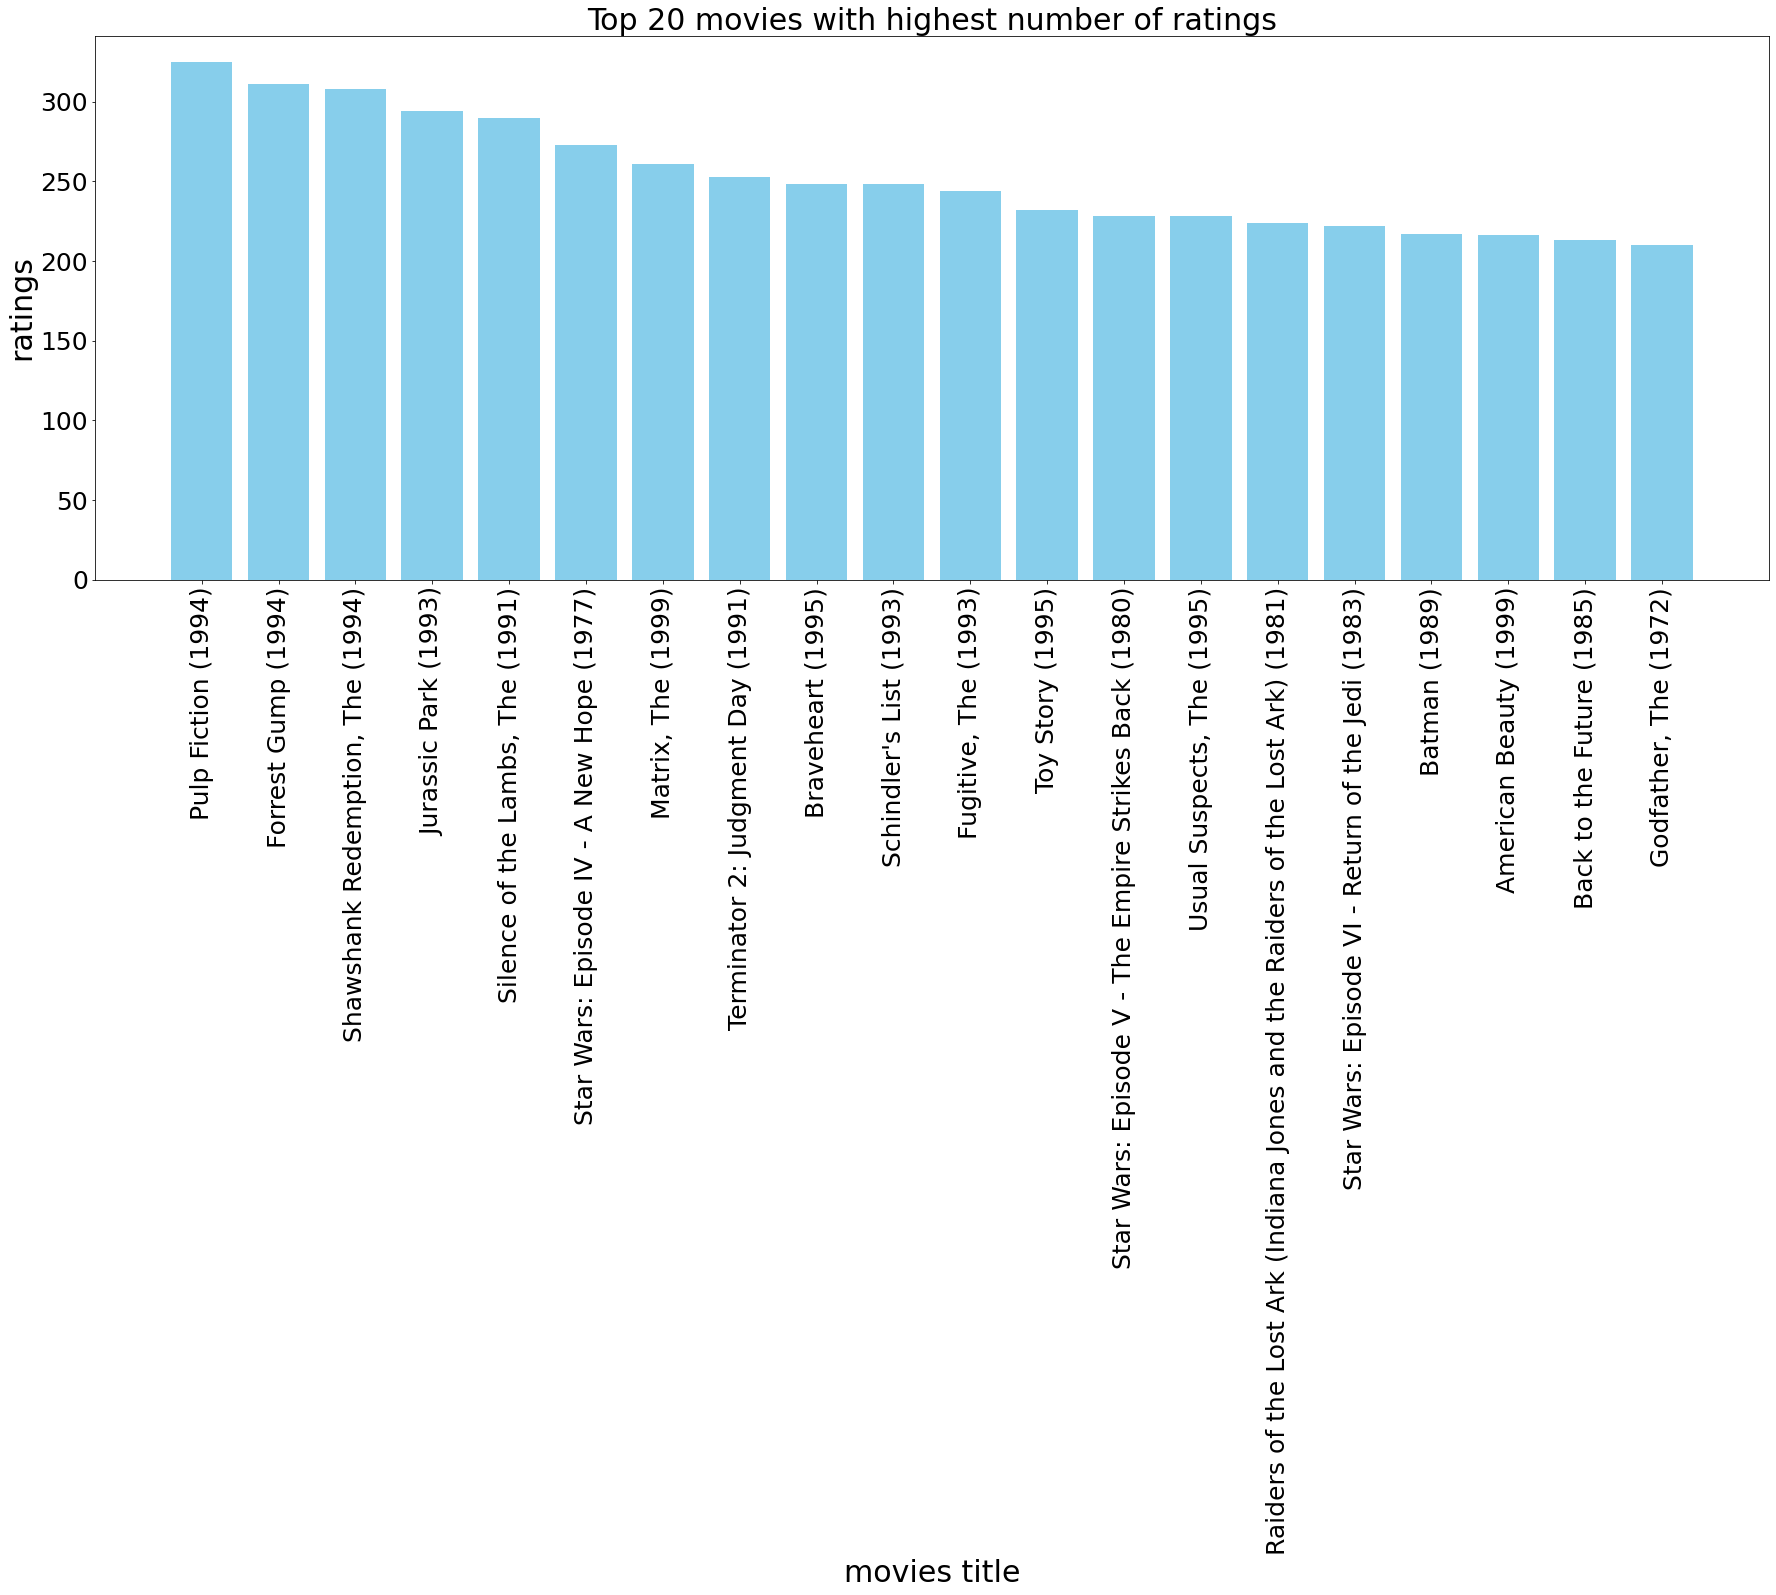

In [16]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='skyblue')

In [17]:
movies['year'] = movies.title.str.extract('(\d\d\d\d)',expand=False)
movies['year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
10324    2015
10325    1966
10326    2015
10327    2015
10328    2015
Name: year, Length: 10329, dtype: object

In [18]:
#Removing the years from the 'title' column

movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')
movies['title']

0                           Toy Story 
1                             Jumanji 
2                    Grumpier Old Men 
3                   Waiting to Exhale 
4         Father of the Bride Part II 
                     ...              
10324          Cosmic Scrat-tastrophe 
10325             Le Grand Restaurant 
10326         A Very Murray Christmas 
10327                   The Big Short 
10328    Marco Polo: One Hundred Eyes 
Name: title, Length: 10329, dtype: object

In [19]:
#Applying the strip function to get rid of any ending whitespace characters that may have appeared

movies['title'] = movies['title'].apply(lambda x: x.strip())

In [20]:
movies= movies.drop('genres', 1)
movies.head()

,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [21]:
ratings = ratings.drop('timestamp', 1)
ratings.head()

,userId,movieId,rating
0,1,16,4.0
1,1,24,1.5
2,1,32,4.0
3,1,47,4.0
4,1,50,4.0


# Collaborative Filtering

In [22]:
userInput = [
            {'title':'Breakfast Club, The', 'rating':5},
            {'title':'Toy Story', 'rating':3.5},
            {'title':'Jumanji', 'rating':2},
            {'title':"Pulp Fiction", 'rating':5},
            {'title':'Akira', 'rating':4.5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Breakfast Club, The",5.0
1,Toy Story,3.5
2,Jumanji,2.0
3,Pulp Fiction,5.0
4,Akira,4.5


In [23]:
#Filtering out the movies by title
inputId = movies[movies['title'].isin(inputMovies['title'].tolist())]

#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)

#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('year', 1)

inputMovies

,movieId,title,rating
0,1,Toy Story,3.5
1,2,Jumanji,2.0
2,296,Pulp Fiction,5.0
3,1274,Akira,4.5
4,1968,"Breakfast Club, The",5.0


In [24]:
#Filtering out users that have watched movies that the input user has watched and storing it

userSubset = ratings[ratings['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head()

,userId,movieId,rating
15,1,296,4.0
113,2,1,5.0
166,3,296,5.0
220,4,296,4.0
339,5,1,4.0


In [25]:
userSubsetGroup = userSubset.groupby(['userId'])

In [26]:
userSubsetGroup.get_group(220)

,userId,movieId,rating
30252,220,1,4.0
30253,220,2,3.5
30326,220,296,4.0
30635,220,1968,3.5


In [27]:
len(userSubsetGroup.get_group(220))

4

In [28]:
userSubsetGroup.get_group(100)

,userId,movieId,rating
11287,100,1,3.0


In [29]:
len(userSubsetGroup.get_group(100))

1

In [30]:
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

In [31]:
userSubsetGroup[0]

(62,
       userId  movieId  rating
 5535      62        1     2.0
 5536      62        2     1.5
 5604      62      296     5.0
 5760      62     1274     3.5
 5857      62     1968     1.0)

In [32]:
#id of top user group
userSubsetGroup[0][0]

62

In [33]:
#dataframe of top user group
userSubsetGroup[0][1]

,userId,movieId,rating
5535,62,1,2.0
5536,62,2,1.5
5604,62,296,5.0
5760,62,1274,3.5
5857,62,1968,1.0


In [34]:
userSubsetGroup = userSubsetGroup[0:100]

In [35]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    
    #Let's start by sorting the input and current user group so the values aren't mixed up
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    
    #Get the N (total similar movies watched) for the formula 
    nRatings = len(group)
    
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    tempRatingList = temp_df['rating'].tolist()
    
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    
    #Now let's calculate the pearson correlation between two users, so called, x and y

    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
   
    if Sxx != 0 and Syy != 0:
        pearsonCorrelationDict[name] = Sxy/np.sqrt(Sxx*Syy)
    else:
        pearsonCorrelationDict[name] = 0

In [36]:
pearsonCorrelationDict.items()

dict_items([(62, 0.44965838938680786), (122, 0.8770580193070289), (224, 0.29417420270727607), (409, 0.8056292332943623), (451, 0.6564386345361464), (461, 0.11720180773462363), (567, 0.8320502943378437), (590, 0.6933752452815365), (607, 0.6020183016345586), (627, 0.7240929464269849), (38, 0.5222329678670935), (88, 0.0), (109, -0.47140452079103173), (128, 0.8866206949335731), (164, 0.4923659639173309), (176, 0.592156525463792), (177, 0.0), (192, -0.51425947722658), (220, 0.30151134457776363), (232, 0.8703882797784892), (250, 0.899228803025897), (310, 0.9438798074485389), (328, -0.7302967433402214), (354, 0.8181818181818182), (358, 0.6446583712203042), (387, 0.45454545454545453), (410, 0.8528028654224418), (413, 0.899228803025897), (493, 0.5222329678670935), (501, 0.4082482904638631), (555, 0.8017837257372732), (560, 0), (603, -0.3779644730092272), (628, 0.8703882797784892), (632, 0.2075143391598224), (668, 0.5222329678670935), (29, 0), (31, -0.8660254037844402), (32, 0.8660254037844402),

In [37]:
pearsonDF = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonDF.head()

,0
62,0.449658
122,0.877058
224,0.294174
409,0.805629
451,0.656439


In [38]:
pearsonDF.columns = ['similarityIndex']
pearsonDF['userId'] = pearsonDF.index
pearsonDF.index = range(len(pearsonDF))
pearsonDF.head()

,similarityIndex,userId
0,0.449658,62
1,0.877058,122
2,0.294174,224
3,0.805629,409
4,0.656439,451


In [39]:
topUsers=pearsonDF.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
50,1.000000,158
53,1.000000,213
94,0.987829,615
55,0.987829,228
39,0.944911,44


In [40]:
topUsersRating = topUsers.merge(ratings, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating
0,1.0,158,1,4.5
1,1.0,158,2,4.0
2,1.0,158,6,4.5
3,1.0,158,10,4.0
4,1.0,158,32,4.0


In [41]:
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,1.0,158,1,4.5,4.5
1,1.0,158,2,4.0,4.0
2,1.0,158,6,4.5,4.5
3,1.0,158,10,4.0,4.0
4,1.0,158,32,4.0,4.0


In [42]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,30.930292,115.143135
2,27.603656,85.617531
3,5.268273,16.472588
4,1.255929,3.767787
5,5.531023,17.606041


In [43]:
recommendation_df = pd.DataFrame()
#We take the weighted average
recommendation_df['Weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_df['movieId'] = tempTopUsersRating.index
recommendation_df.head()

,Weighted average recommendation score,movieId
movieId,,
1,3.722666,1
2,3.101674,2
3,3.126753,3
4,3.000000,4
5,3.183144,5


# Recommended movies

In [44]:
recommendation_df = recommendation_df.sort_values(by='Weighted average recommendation score', ascending=False)
recommendation_df.head()

,Weighted average recommendation score,movieId
movieId,,
27366,5.0,27366
1099,5.0,1099
897,5.0,897
101529,5.0,101529
68522,5.0,68522


In [45]:
movies.loc[movies['movieId'].isin(recommendation_df.head(20)['movieId'].tolist())]

,movieId,title,year
718,897,For Whom the Bell Tolls,1943
895,1099,"Christmas Carol, A",1938
996,1236,Trust,1990
1486,1914,Smoke Signals,1998
1768,2227,"Lodger: A Story of the London Fog, The",1927
3485,4454,More,1998
4888,6672,War Photographer,2001
5152,7075,"Court Jester, The",1956
5244,7215,To Have and Have Not,1944
5258,7234,"Strada, La",1954


# Content Based Recommendation System.

In [46]:
movies_df=pd.read_csv('movies.csv')
ratings_df=pd.read_csv('ratings.csv')

In [47]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies_df['genres'])

In [57]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [50]:
indices=pd.Series(movies_df.index,index=movies_df['title'])
titles=movies_df['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

# Recommended movies

In [51]:
recommendations('Toy Story 2 (1999)')

1815                                           Antz (1998)
2496                                    Toy Story 2 (1999)
2967        Adventures of Rocky and Bullwinkle, The (2000)
3166                      Emperor's New Groove, The (2000)
3811                                 Monsters, Inc. (2001)
6617     DuckTales: The Movie - Treasure of the Lost La...
6997                                      Wild, The (2006)
7382                                Shrek the Third (2007)
7987                        Tale of Despereaux, The (2008)
9215     Asterix and the Vikings (Astérix et les Viking...
9732                                          Turbo (2013)
10052                                Boxtrolls, The (2014)
1595                            Black Cauldron, The (1985)
1675                         Lord of the Rings, The (1978)
2696                 We're Back! A Dinosaur's Story (1993)
3420                      Atlantis: The Lost Empire (2001)
3535                          Land Before Time, The (198

# Evaluation Metrics

In [52]:
pip install surprise


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [99]:
import os
import random
import operator
import requests
import numpy as np
import pandas as pd
from scipy import sparse
import sys
from surprise import Dataset, Reader
from surprise import KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.dataset import DatasetAutoFolds
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('ratings.csv', 
                          error_bad_lines=False, 
                          warn_bad_lines=False,
                          skiprows=lambda i: i>0 and random.random() > 0.2)

print(len(df))
print(df['rating'].unique().tolist())
print(len(df['userId'].unique().tolist()))
print(len(df['movieId'].unique().tolist()))

21141
[4.0, 0.5, 3.0, 3.5, 5.0, 1.5, 4.5, 2.5, 2.0, 1.0]
666
5456


In [101]:
reader = Reader(rating_scale=(0,10)) # rating scale range
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
print(type(data))

<class 'surprise.dataset.DatasetAutoFolds'>


In [102]:
trainset, testset = train_test_split(data, test_size=0.25)
print(type(trainset))

<class 'surprise.trainset.Trainset'>


In [103]:
algo = SVD()
algo.fit(trainset)

In [104]:
predictions = algo.test(testset)

In [106]:
accuracy.mse(predictions)

MSE: 0.8516


0.8515791165180502

In [105]:
accuracy.rmse(predictions)

RMSE: 0.9228


0.9228104445215443